In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import datetime
import os

In [4]:
data = pd.read_fwf('combined.txt')
data['start'] = data.apply(lambda x: pd.datetime.strptime("{:4.0f} {:2.0f} {:2.0f} {:2.0f}:00".format(x['Year'], x['Month'], x['Day'], x['Hour']), "%Y %m %d %H:%M"), axis=1)
"""
data["Month_rolled"] = 0
for i in range(len(data.Month)):
    if data.Month[i] > 6:
        data["Month_rolled"][i] = data.Month[i]-6
    else:
        data["Month_rolled"][i] = abs(data.Month[i]-6)
"""
df = data[['start','length', 'hsig', 'tps', 'a_hsig', 'a_tps']]
df['end'] = pd.datetime(1900,12,31)
for i in range(len(df['length'])):
    df['end'].iloc[i] = df['start'].iloc[i]+pd.Timedelta(hours=df['length'].iloc[i])

/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
os.chdir(r"/media/sf_C_DRIVE/Users/jdorvinen/Documents/Jared/Projects/East Hampton/met_data/montauk_tide")
data2 = pd.read_csv("8510560_swel.csv")
df2 = data2[[" Water Level", "Date Time"]]
df2.columns = ['swel', 'datetime']
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)
swel = []
for indexer in range(len(df['start'])):
    begin = df['start'].loc[indexer]
    end = df['end'].loc[indexer]
    swel.append(df2['swel'][begin:end].quantile(0.6))
df['swel'] = pd.Series(swel)

/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5956022e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc5947dc128>]], dtype=object)

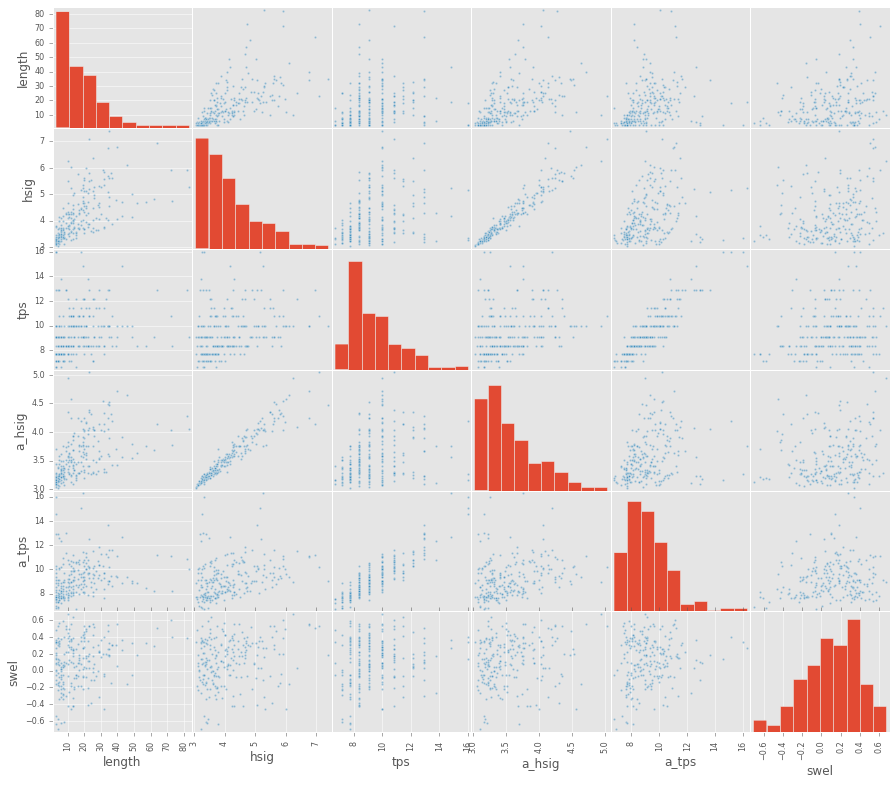

In [4]:
pd.tools.plotting.scatter_matrix(df, alpha=0.5, figsize=(15,13))

In [ ]:
fig = pd.tools.plotting.scatter_plot(df, 'hsig', 'tps')

In [ ]:
sequence = ['start', 'end', 'length', 'swel', 'hsig', 'tps', 'a_hsig', 'a_tps']
df = df.reindex(columns=sequence)

In [ ]:
#df[df['swel'].isnull()]

In [ ]:
outputfile = 'combined_data.csv'

In [ ]:
def write_files(storms,outputfile):
    """Write list of storms to output file"""
    with open(outputfile, "w") as output:
        line = "              start                   end  length    swel    hsig     tps  a_hsig   a_tps\n"
        output.write(line)
        for storm in range(len(storms["start"])):
            start = '{!s}'.format(str(storms["start"][storm]))
            end = '   {!s}'.format(str(storms["end"][storm]))
            length = '{:>8}'.format(storms["length"][storm])
            swel = '{:>8.2f}'.format(storms["swel"][storm])
            hsig = '{:>8.2f}'.format(storms["hsig"][storm])
            tps = '{:>8.2f}'.format(storms["tps"][storm])
            a_hsig = '{:>8.2f}'.format(storms["a_hsig"][storm])
            a_tps = '{:>8.2f}'.format(storms["a_tps"][storm])
            line = start+end+length+swel+hsig+tps+a_hsig+a_tps+"\n"
            output.write(line)

In [ ]:
write_files(df, outputfile)

In [6]:
x = df['hsig'].values
y = df['length'].values

In [7]:
from ambhas.copula import Copula

In [8]:
frank = Copula(x,y,family='frank')
gumbel = Copula(x,y,family='gumbel')
clayton = Copula(x,y,family='clayton')

In [9]:
uf,vf = frank.generate_xy(1000)
ug,vg = gumbel.generate_xy(1000)
uc,vc = clayton.generate_xy(1000)

NameError: name 'st' is not defined

In [ ]:
fig, ax = plt.subplots(2,2, figsize=[10,9])

ax[0,0].scatter(x, y)
ax[0,1].scatter(uf, uf)
ax[1,0].scatter(ug, ug)
ax[1,1].scatter(uc, uc)

ax[0,0].set_xlim(0.95*min(x),1.05*max(x))
ax[0,0].set_ylim(0.95*min(y),1.05*max(y))
ax[0,1].set_xlim(0,1)
ax[0,1].set_ylim(0,1)
ax[1,0].set_xlim(0,1)
ax[1,0].set_ylim(0,1)
ax[1,1].set_xlim(0,1)
ax[1,1].set_ylim(0,1)

In [ ]:
Copula??

In [ ]:
frank.theta

In [ ]:
x.ndim

In [ ]:
ax[0]

In [ ]:
import statistics

In [ ]:
statistics.

In [ ]:
import numpy as np
import stats

In [ ]:
import copulalib

In [ ]:
copulalib??

In [ ]:
ambhas??

In [ ]:
import ambhas

In [ ]:
ambhas??

In [9]:
import scipy.stats as spt
